<a href="https://colab.research.google.com/github/rohatgiananya/CS-348/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3 - Graphical Models - CS348 Spring 2025

**Description** - In this assignment, you will solve problems related to casual inference, conditional independence, graphical models, and anomaly detection.

**Getting Started** - You should complete the assignment using your own installation of Python 3 and the packages numpy, pandas, matplotlib, seaborn, etc. Download the assignment from Canvas and unzip the file. This will create a directory with this file, 'HW03.ipynb'. I'd recommend looking through the assignment to see what questions are asked before starting.

Note: You may need to install the seaborn visualization library. To do this run `conda install seaborn` or `pip install seaborn` in your terminal. The same is said for the bnlearn library, a library built for graphical models and bayesian networks. To install bnlearn, run `conda install bnlearn` or `pip install bnlearn` in the terminal. Or run `! pip install bnlearn` in the notebook itself. You'll need to restart and run the code again after first installing bnlearn. MAKE SURE TO ACTIVATE YOUR ENVIRONMENT IF INSTALLING PACKAGES IN THE TERMINAL.

**Deliverables** - The assignment has a single deliverable: this jupyter notebook file saved as a PDF. Please answer all coding and writing questions in the body of this file. Once all of the answers are complete, download the file by navigating the following menus: File -> Download as -> PDF via LaTeX. Submit the downloaded PDF file on gradescope (if you are using Mac OS, we recommend using a browser other than Chrome). Otherwise, create a PDF using VSCode.

Note: You will be writing the written responses in the dedicated **Part _ Written Response** cells. You'll be writing your code in the dedicate coding cells under `--- write code here ---`

**Data Sets** - In this assignment, you will utilize a dataset from the UCI repository focused on obesity classification based on eating habits and physical condition. Dataset link [here](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) and paper link [here](https://pmc.ncbi.nlm.nih.gov/articles/PMC6710633/#sec1)

**Academic Honesty Statement** —


I encourage you to discuss and obtain help from other students with: (1) basic concepts covered in lectures or textbook; (2) assignment understanding (but not solutions); and (3) program implementation (but not design). All the solutions on assignments must be your own. Using other people's code for, or solutions to, the assignments is unacceptable. You are expected to take reasonable precautions to prevent others from using your work.

Using other people's words directly without attribution is plagiarism, a serious breach of academic honesty. If you have received significant ideas or specific words from another student, a written source, or an AI system such as a large language model, this must be acknowledged with a citation.

Academic dishonesty is prohibited in all programs of the University. Academic dishonesty includes but is not limited to: cheating, fabrication, plagiarism, and facilitating dishonesty. Appropriate sanctions may be imposed on any student who has committed an act of academic dishonesty.



In [1]:
# If you are not working in google colab, you'll have to comment this code block
# If you are using google colab, fill in your folder path that contains the assignment
# materials.
from google.colab import drive
import os
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/HW3_Student"
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem 1 - Graphical Models (50 points)

<img src="https://drive.google.com/uc?id=1qnZxHkyYHEz12exmozE7WJncipa5yUGP" alt="drawing" width="500"/>

### **Part 1** (4 points)

1. Which nodes are parents of node D?
2. Which nodes are children of node B?

**Part 1 Written Response** (4 points)

1. B, F, E
2. D, E

### **Part 2** (6 points)

1. Which nodes are descendants of node A?
2. Which nodes have no descendants?
3. Which nodes have no ascendants?

**Part 2 Written Response** (6 points)

1. E, D, G
2. G
3. A, C, F

### **Part 3** (4 points)

What variables are potential causes of variable E?

**Part 3 Written Response** (4 points)

As there are directed paths from A, B, and C to E, the variables that are potential causes of E are A, B, and C.


### **Part 4** (5 points)

List any colliders present in the graphical model

**Part 4 Written Response** (5 points)

1. A → E ← B
2. B → D ← F
3. E → D ← F
4. D → G ← H

### **Part 5** (8 points)

Which of the following pairs of variables are independent with an empty conditioning set?

1. <H,D>
2. <C,F>
3. <B,G>
4. <A,H>

**Part 5 Written Response** (8 points)

$C \!\perp\!\!\!\perp F$

From the given pairs of variables, only <C,F> are independent with an empty conditioning set as all trails from C to F are d-separated. The remianing pairs of variables have atleast one trail that is d-connected.

### **Part 6** (6 points)

For each pair of variables, determine if they are d-separated given D? If they are not d-separated, show all d-connecting paths

1. <B,G>
2. <A,F>
3. <A,B>


**Part 6 Written Response** (6 points)

1. <B,G> is not d-separated given D as it has two d-connecting path:
    * BEDFHG
    * BDFHG
2. <A,F> is not d-separated given D as it has one d-connecting path:
    * AEDF
3. <A,B> is not d-separated given D as it has one d-connecting path:
    * AEDB

### **Part 7** (6 points)

For each of the following conditional independence statements, state whether they are or are NOT implied by the graph? <br>

1. $H \!\perp\!\!\!\perp E | G$
2. $A \!\perp\!\!\!\perp C | B, E$
3. $F \!\perp\!\!\!\perp B | D$


**Part 7 Written Response** (6 points)

1. $H \!\perp\!\!\!\perp E | G$  is not implied by the graph as there is atleast one trail that is d-connecting.
2. $A \!\perp\!\!\!\perp C | B, E$  is not implied by the graph as there is atleast one trail that is d-connecting.
3. $F \!\perp\!\!\!\perp B | D$  is not implied by the graph as there is atleast one trail that is d-connecting.


### **Part 8** (6 points)

If we were to intervene on variable D, how would this change the graphical model? Specify which nodes/edges change.

**Part 8 Written Response** (6 points)

Intervening on variable D means that we set the value of D externally and remove all its causes (remove edges that connect D to its parents). Therefore, in the new graphical model we will remove the following edges:
* B → D
* E → D
* F → D

All other edges and nodes remain the same.

### **Part 9** (5 points)

Give the expression for the factorized joint probability distribution of all the variables (A, B, C, D, E, F, G, H) that is specifically implied by this graphical model.

**Part 9 Written Response** (5 points)

P(A, B, C, D, E, F, G, H) = P(A)$\cdot$P(C)$\cdot$P(F)$\cdot$P(B|C)$\cdot$P(H|F) P(E|A, B)$\cdot$P(D|B, E, F)$\cdot$P(G|D, H)






# Problem 2: Application - Obesity Inference (50 points)

In this problem you will use the ``bnlearn`` package to learn the structure of a causal graphical model from data, parameterize the graph, i.e., learn the values of the conditional probability distributions (CPDs), and perform inference using the learned model.

We will be using a dataset from the UCI repository. Here's the link: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Familiarize yourself with the dataset and the variables before starting this problem.


In [2]:
!pip install bnlearn # Uncomment this if you want to install the bnlearn package from inside the notebook rather than the terminal
import numpy as np
import bnlearn as bn # You will need to restart the kernel and re-run the code to properly import bnlearn.
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(0)

In [3]:
# DO NOT ALTER
data = pd.read_csv("obesity_data.csv")
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [4]:
# DO NOT ALTER
# Labels used from the PubMed paper: https://pmc.ncbi.nlm.nih.gov/articles/PMC6710633/#sec1
# Bins were created independently from the paper
data['Activity Level'] = pd.cut(x=data["FAF"], bins=[-1,0.5,1.5,2.5,3.5],
                               labels=["No activity","1 or 2 days","2 or 4 days","4 or 5 days"])
data['Veggie Intake'] = pd.cut(x=data["FCVC"], bins=[0.5,1.5,2.5,3.5],
                               labels=["Never","Sometimes","Always"])

data['No. Main Meals'] = pd.cut(x=data["NCP"], bins=[0.5,2.0,3.5,4.5],
                               labels=["Between 1 and 2","Three","More than three"])

data['H2O Intake'] = pd.cut(x=data["CH2O"], bins=[0.5,1.5,2.5,3.5],
                               labels=["Less than 1L","Between 1L and 2L","More than 2L"])

data['Tech Use'] = pd.cut(x=data["TUE"], bins=[-0.5,0.5,1.5,2.5],
                               labels=["0-2 Hours","3-5 Hours","More than 5 hours"])

# These labels and bins were created independently from the paper
data['Binned Age'] = pd.cut(x=data['Age'], bins=[0, 3, 18, 63, 99],
                            labels=['Baby', 'Child', 'Adult', 'Elderly'])
data['Binned Height'] = pd.cut(x=data["Height"], bins=[0,1.6,1.8,2.5], # meters
                               labels=["Short","Medium","Tall"])
data["Binned Obesity Level"] = data["NObeyesdad"].apply(lambda x: "Insufficient" if 'Insufficient' in x else \
 ("Normal" if 'Normal' in x else ("Overweight" if "Overweight" in x else "Obese")))

In [5]:
# DO NOT ALTER
data_subset = data.loc[:, (data.nunique() < 8).values]
data_subset.drop(columns=["SMOKE","FAVC",], inplace=True)
data_subset.rename(columns={"CAEC": "Food Between Meals", "SCC": "Monitor Calories", "CALC": "Alcohol Intake", "MTRANS": "Transportation", "NObeyesdad": "Obesity Level"}, inplace=True)

data_subset_bin = data_subset.drop(columns=["Obesity Level"]).rename(columns={"Binned Obesity Level":"Obesity Level"})
data_subset = data_subset.drop(columns=["Binned Obesity Level"])

# data_subset.describe(include="all")

In [6]:
# Here are the possible values for each variable
for i in data_subset:
  print(i, ": ", data_subset[i].unique())

Gender :  ['Female' 'Male']
family_history_with_overweight :  ['yes' 'no']
Food Between Meals :  ['Sometimes' 'Frequently' 'Always' 'no']
Monitor Calories :  ['no' 'yes']
Alcohol Intake :  ['no' 'Sometimes' 'Frequently' 'Always']
Transportation :  ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Obesity Level :  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Activity Level :  ['No activity', '4 or 5 days', '2 or 4 days', '1 or 2 days']
Categories (4, object): ['No activity' < '1 or 2 days' < '2 or 4 days' < '4 or 5 days']
Veggie Intake :  ['Sometimes', 'Always', 'Never']
Categories (3, object): ['Never' < 'Sometimes' < 'Always']
No. Main Meals :  ['Three', 'Between 1 and 2', 'More than three']
Categories (3, object): ['Between 1 and 2' < 'Three' < 'More than three']
H2O Intake :  ['Between 1L and 2L', 'More than 2L', 'Less than 1L']
Categories (3, object): ['Less than 1L' < 'B

### **Part 1** (6 points)

The bnlearn library has a method for learning the structure of a graphical model describing the dependencies across variables. Use `bn.structure_learning` to learn the DAG. Then use `bn.plot_graphviz(DAG)` function to plot the learned DAG.

If this plot function doesn't work. You can also try `bn.plot(DAG)`. The following arguments may also obe useful:<br>
`node_color='white', params_static={'layout':'planar_layout', 'arrowsize': 50}`


[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[07-05-2025 01:23:05] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[07-05-2025 01:23:05] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.


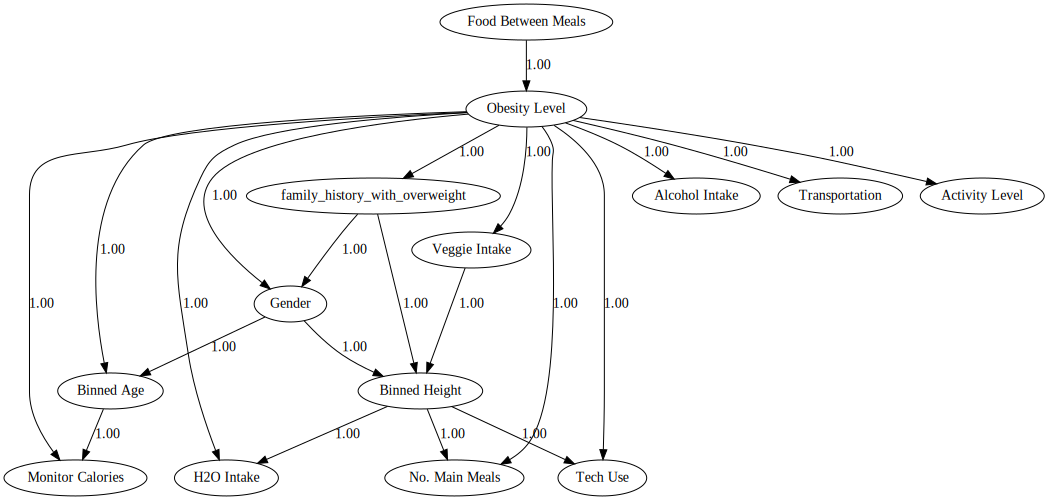

In [7]:
# Part 1 Solution
random.seed(0)
# --- write code here ---
model = bn.structure_learning.fit(data_subset)
bn.plot_graphviz(model)

### **Part 2** (2 points)

Display the learned DAG as an adjacency matrix.


In [8]:
# Part 2 Solution

# --- write code here ---
adj_matrix = model["adjmat"]
print(adj_matrix)

target                          Gender  family_history_with_overweight  \
source                                                                   
Gender                           False                           False   
family_history_with_overweight    True                           False   
Food Between Meals               False                           False   
Monitor Calories                 False                           False   
Alcohol Intake                   False                           False   
Transportation                   False                           False   
Obesity Level                     True                            True   
Activity Level                   False                           False   
Veggie Intake                    False                           False   
No. Main Meals                   False                           False   
H2O Intake                       False                           False   
Tech Use                         False

### **Part 3** (6 points)

Use `parameter_learning.fit` to estimate the parameters of the graphical model using the `bayes` method. Store the conditional probability distributions learned for the variables in your graph using `bn.print_CPD` into an object named `CPDs`. I would recommend using `verbose=0` in these function calls to curb the printed output length.


In [9]:
# Part 3 Solution

# --- write code here ---
bayes_model = bn.parameter_learning.fit(model, data_subset, methodtype = "bayes",
                                        verbose = 0)
CPDs = bn.print_CPD(bayes_model, verbose = 0)

### **Part 4** (7 points)

Using the CPDs object you saved from part 3, compute the following probabilities/distributions. In the off chance that your graphical model is different than the answer, use the `bn.inference.fit` function similar to Part 5.

1. What is the probability that a person is considered normal weight given that they eat frequently between meals?
2. What is the probability distribution P(**Activity Level** | Obesity Level=Obesity_Type_III)? Hint: Your answer should be a vector of probabilities
3. What is the probability that a person is female given they are considered to have insufficient weight and no family history of overweight problems?

In [10]:
# Part 4 Solution

# 1. (2 points)
# --- write code here --
print(CPDs['Obesity Level'], end = "\n\n")

# 2. (3 points)
# --- write code here ---
print(CPDs["Activity Level"], end = "\n\n")

# 3. (2 points)
# --- write code here ---
print(CPDs["Gender"])

          Obesity Level Food Between Meals         p
0   Insufficient_Weight             Always  0.124470
1   Insufficient_Weight         Frequently  0.318525
2   Insufficient_Weight          Sometimes  0.090181
3   Insufficient_Weight                 no  0.128619
4         Normal_Weight             Always  0.233380
5         Normal_Weight         Frequently  0.241289
6         Normal_Weight          Sometimes  0.096632
7         Normal_Weight                 no  0.151875
8        Obesity_Type_I             Always  0.137671
9        Obesity_Type_I         Frequently  0.084785
10       Obesity_Type_I          Sometimes  0.185466
11       Obesity_Type_I                 no  0.121974
12      Obesity_Type_II             Always  0.124470
13      Obesity_Type_II         Frequently  0.074623
14      Obesity_Type_II          Sometimes  0.163134
15      Obesity_Type_II                 no  0.121974
16     Obesity_Type_III             Always  0.117869
17     Obesity_Type_III         Frequently  0.

**Part 4 Written Response** (5 points)

1. To find the probability that a person is considered normal weight given that they eat frequently between meals, we can look at conditional probability distribution of Obesity Level.
    * **P(Obesity Level = Normal Weight | Food Between Meals = Frequently) = 0.241289**

2. To find the probability distribution P(Activity Level | Obesity Level = Obesity_Type_III), we can look at the conditional probability distribution of Activity Level.
    * **P(Activity Level | Obesity Level = Obesity_Type_III) = [0.222154, 0.224296, 0.076499, 0.477050]**
3. To find the probability that a person is female given they are considered to have insufficient weight and no family history of overweight problems, we can look at the conditional probability distribution of Activity Level.
    * **P(Gender = Female | Obesity Level = Insufficient_Weight, family_history_with_overweight = no) = 0.757556**

### **Part 5** (9 points)

Some probabilities we are interested in aren't directly captured by the CPDs and require Bayes' Rule to compute. Let's use `bn.inference.fit` to perform inference on the graph. Compute the probabilities of the following questions:

- Q1) What is the probability of a person being class III obese, given their transportation is usually walking?
- Q2) What is the probability of a person being normal weight given they use technological devices for less than 2 hours a day and they drink between 1 and 2 liters of water per day?
- Q3) What is the probability that someone frequently consumes food between meals given they monitor their calories and they are considered to have insufficient weight?
- Q4) What is the probability distribution P(**family_history_with_overweight**, **Gender** | Alcohol="Always")? Hint: the answer should be a vector with a label for each value


In [11]:
# Part 5 Solution

# 1 (2 points)
# --- write code here ---
Q1 = bn.inference.fit(bayes_model, variables = ["Obesity Level"],
                      evidence = {"Transportation" : "Walking"},
                      verbose = 0)
print("Q1)\n", Q1, end = "\n\n")

# 2 (2 points)
# --- write code here ---
Q2 = bn.inference.fit(bayes_model, variables = ["Obesity Level"],
                      evidence = {"Tech Use" : "0-2 Hours",
                                  "H2O Intake" : "Between 1L and 2L"},
                      verbose = 0)
print("Q2)\n", Q2, end = "\n\n")

# 3 (2 points)
# --- write code here ---
Q3 = bn.inference.fit(bayes_model,
                      variables = ["Food Between Meals"],
                      evidence = {"Monitor Calories" : "yes",
                                  "Obesity Level" : "Insufficient_Weight"},
                      verbose = 0)
print("Q3)\n", Q3, end = "\n\n")

# 4 (3 points)
# --- write code here ---
Q4 = bn.inference.fit(bayes_model,
                      variables=["family_history_with_overweight", "Gender"],
                      evidence={"Alcohol Intake" : "Always"},
                      verbose = 0)
print("Q4)\n", Q4)

Q1)
 +------------------------------------+----------------------+
| Obesity Level                      |   phi(Obesity Level) |
+====================================+======================+
| Obesity Level(Insufficient_Weight) |               0.1350 |
+------------------------------------+----------------------+
| Obesity Level(Normal_Weight)       |               0.2366 |
+------------------------------------+----------------------+
| Obesity Level(Obesity_Type_I)      |               0.1194 |
+------------------------------------+----------------------+
| Obesity Level(Obesity_Type_II)     |               0.1155 |
+------------------------------------+----------------------+
| Obesity Level(Obesity_Type_III)    |               0.1116 |
+------------------------------------+----------------------+
| Obesity Level(Overweight_Level_I)  |               0.1468 |
+------------------------------------+----------------------+
| Obesity Level(Overweight_Level_II) |               0.1350 |
+--

**Part 5 Written Response** (5 points)

1. P(Obesity Level = Obesity_Type_III | Transportation = Walking) = 0.1116
2. P(Obesity Level = Normal_Weight | Tech Use = 0-2 Hours, H2O Intake = Between 1L and 2L) = 0.1446
3. P(Food Between Meals = Frequently | Monitor Calories = yes, Obesity Level = Insufficient_Weight) = 0.3778
4. P(**family_history_with_overweight, Gender** | Alcohol Intake = Always) = <br>
    [{family_history_with_overweight = no, Gender = Female} : 0.1594,<br>{family_history_with_overweight = no, Gender = Male} : 0.1317,<br>{family_history_with_overweight = yes, Gender = Female} : 0.3347,<br>{family_history_with_overweight = yes, Gender = Male} : 0.3742]

### **Part 6** (6 points)

**Using the CPD** for Activity Level, create a plot showing the relationship between Activity Level and Obesity Level. What insights can you draw from this plot?

For example, plot the different Obesity Level classes on the x-axis, have a line for each Activity Level, and have the probability that a particular Activity Level occurs given the Obesity Level on the y-axis.

I'd recommend using `seaborn` plotting library for this, specifically the `catplot` function: [(link)](https://seaborn.pydata.org/generated/seaborn.catplot.html). It can take pandas dataframes as input, and you can specify which variable goes on the x, y, color, or column/row axes easily.

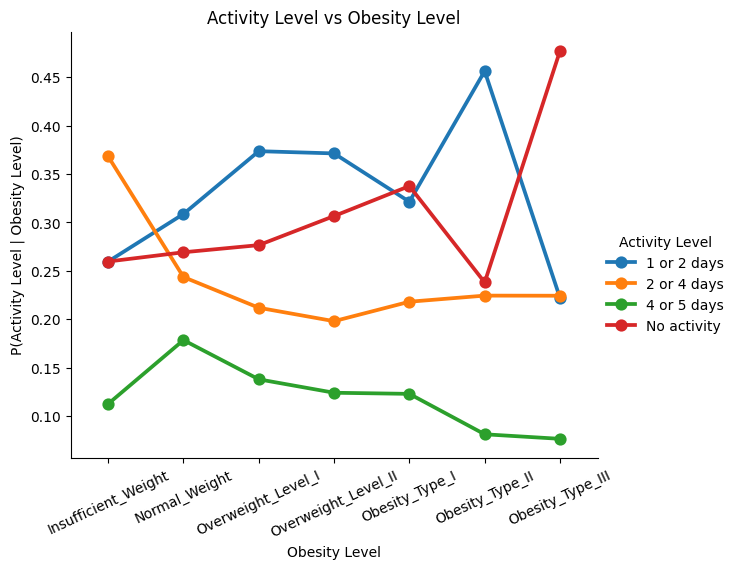

In [17]:
# Part 6 Solution

# --- write code here ---
sns.catplot(data = CPDs["Activity Level"], kind = "point", x = "Obesity Level",
            y = "p", hue = "Activity Level", height = 5, aspect = 1.25,
            order=["Insufficient_Weight", "Normal_Weight","Overweight_Level_I",
                   "Overweight_Level_II","Obesity_Type_I","Obesity_Type_II",
                   "Obesity_Type_III"])
plt.title("Activity Level vs Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("P(Activity Level | Obesity Level)")
plt.xticks(rotation = 25)
plt.show()

**Part 6 Written Response** (5 points)

Insights:
* Given that a person is considered to have obesity type I, II or III, they are more likely to be doing little to no activity (no activity, 1 or 2 days)
* Like obesity types, given that a person is considered to have overweight level I or II, they are more likely to be doing little to no activity (no activity, 1 or 2 days)
* Given that a person is considered to have insufficient weight, they are more likly to be doing moderate to little activity (1 or 2 days, 2 or 4 days)
* Given that a considered to have normal weight, they are more likely to be doing little to no activity (no activity, 1 or 2 days)

### **Part 7** (8 points)

Here I give the code to generate another type of plot. Instead of using the CPD for activity level which tells us what the probability is that someone has a specific activity level given they their obesity classification, we are using Bayes' rule to get another probability: the probability that someone is of a particular obesity level given they their activity level.

Compare the figure you made in the previous part to the figure here. What does each figure communicate? If we only know someone's activity level but want to predict what obesity level they might be, which plot would we want to see more to make this prediction?

Just set `DAG` equal to your bayesian network model that you've developed and run the following two codeblocks.

In [13]:
# --- write code here ---
dag = bayes_model
# --- end code here

q1 = bn.inference.fit(dag, variables=["Obesity Level"], evidence={"Activity Level":"No activity"}, verbose=0)
q2 = bn.inference.fit(dag, variables=["Obesity Level"], evidence={"Activity Level":"1 or 2 days"}, verbose=0)
q3 = bn.inference.fit(dag, variables=["Obesity Level"], evidence={"Activity Level":"2 or 4 days"}, verbose=0)
q4 = bn.inference.fit(dag, variables=["Obesity Level"], evidence={"Activity Level":"4 or 5 days"})

[bnlearn] >Variable Elimination.
+----+---------------------+-----------+
|    | Obesity Level       |         p |
+====+=====================+===========+
|  0 | Insufficient_Weight | 0.126597  |
+----+---------------------+-----------+
|  1 | Normal_Weight       | 0.207898  |
+----+---------------------+-----------+
|  2 | Obesity_Type_I      | 0.164537  |
+----+---------------------+-----------+
|  3 | Obesity_Type_II     | 0.0967867 |
+----+---------------------+-----------+
|  4 | Obesity_Type_III    | 0.0967867 |
+----+---------------------+-----------+
|  5 | Overweight_Level_I  | 0.161827  |
+----+---------------------+-----------+
|  6 | Overweight_Level_II | 0.145567  |
+----+---------------------+-----------+

Summary for variables: ['Obesity Level']
Given evidence: Activity Level=4 or 5 days

Obesity Level outcomes:
- Obesity Level: Insufficient_Weight (12.7%)
- Obesity Level: Normal_Weight (20.8%)
- Obesity Level: Obesity_Type_I (16.5%)
- Obesity Level: Obesity_Type_II (9.

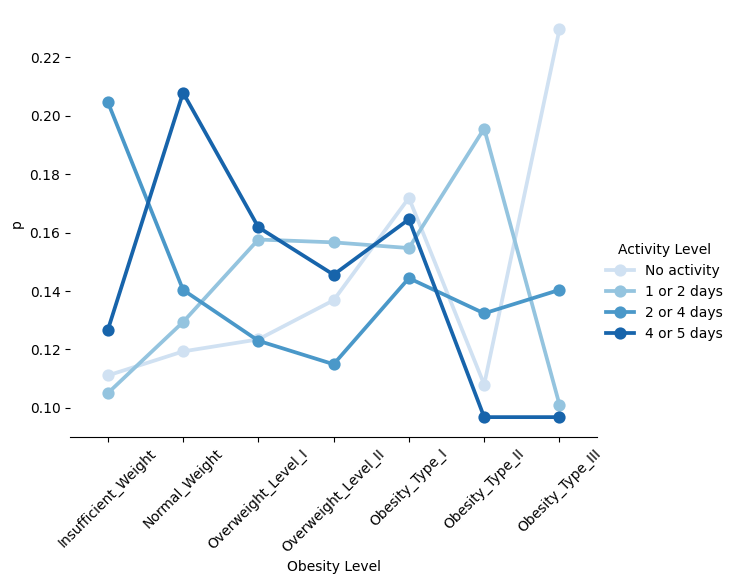

In [14]:
q6_df=pd.concat([q1.df,q2.df,q3.df,q4.df])
q6_df['Activity Level'] = np.repeat(['No activity','1 or 2 days','2 or 4 days', '4 or 5 days'],[7,7,7,7])

g = sns.catplot(
    data=q6_df, x="Obesity Level", y="p", hue="Activity Level",
    kind="point", height=5, aspect=1.25, palette="Blues",
    order=["Insufficient_Weight", "Normal_Weight","Overweight_Level_I","Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"],
    hue_order = ["No activity","1 or 2 days","2 or 4 days","4 or 5 days"]
)

g.tick_params(axis='x', rotation=45)
g.despine(left=True)

**Part 7 Written Response** (5 points)

The P(Activity Level | Obesity Level) plot in part 6 helps us understand how activity levels vary among people in with different obesity levels. For example, it shows that people with higher obesity levels do little to no activity more frequently, while those with normal or insufficient weight have a more balanced distributions across various activity levels. This plot is useful when we already know a person's obesity level and want to explore their likely activity patterns.

In contrast, the P(Obesity Level | Activity Level) plot in part 7 helps us understand how obesity levels vary among people with different activity levels. This plot is better suited for making predictions about a person's obesity level based on their activity levels. For example, it shows that people who have a high activity level are more likely to fall into normal or lower obesity categories, while those with no activity are more likely to have higher obesity levels like Type II or III.

Therefore, if we are given someone's activity level and want to predict their likely obesity category, the part 7 plot is more informative and should be preferred.

### **Part 8** (6 points)

Here, we will use a binned version of the target variable. Instead of having seven classes, we will map the variable into four classes (Insufficient Weight, Normal Weight, Overweight, Obese). We've provided some code for you that performs structure learning on the data with the new target variable.

Does binning the target variable affect the learned causal structure? What causal relationships changed? Why do you think the learned causal structure changes or does not change when we bin the target variable?

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[07-05-2025 01:23:55] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[07-05-2025 01:23:55] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.
[07-05-2025 01:23:55] [setgraphviz.setgraphviz] [INFO] The OS is not supported to automatically set Graphviz in the system env.
[07-05-2025 01:23:55] [setgraphviz.setgraphviz] [INFO] Graphviz path found in environment.


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


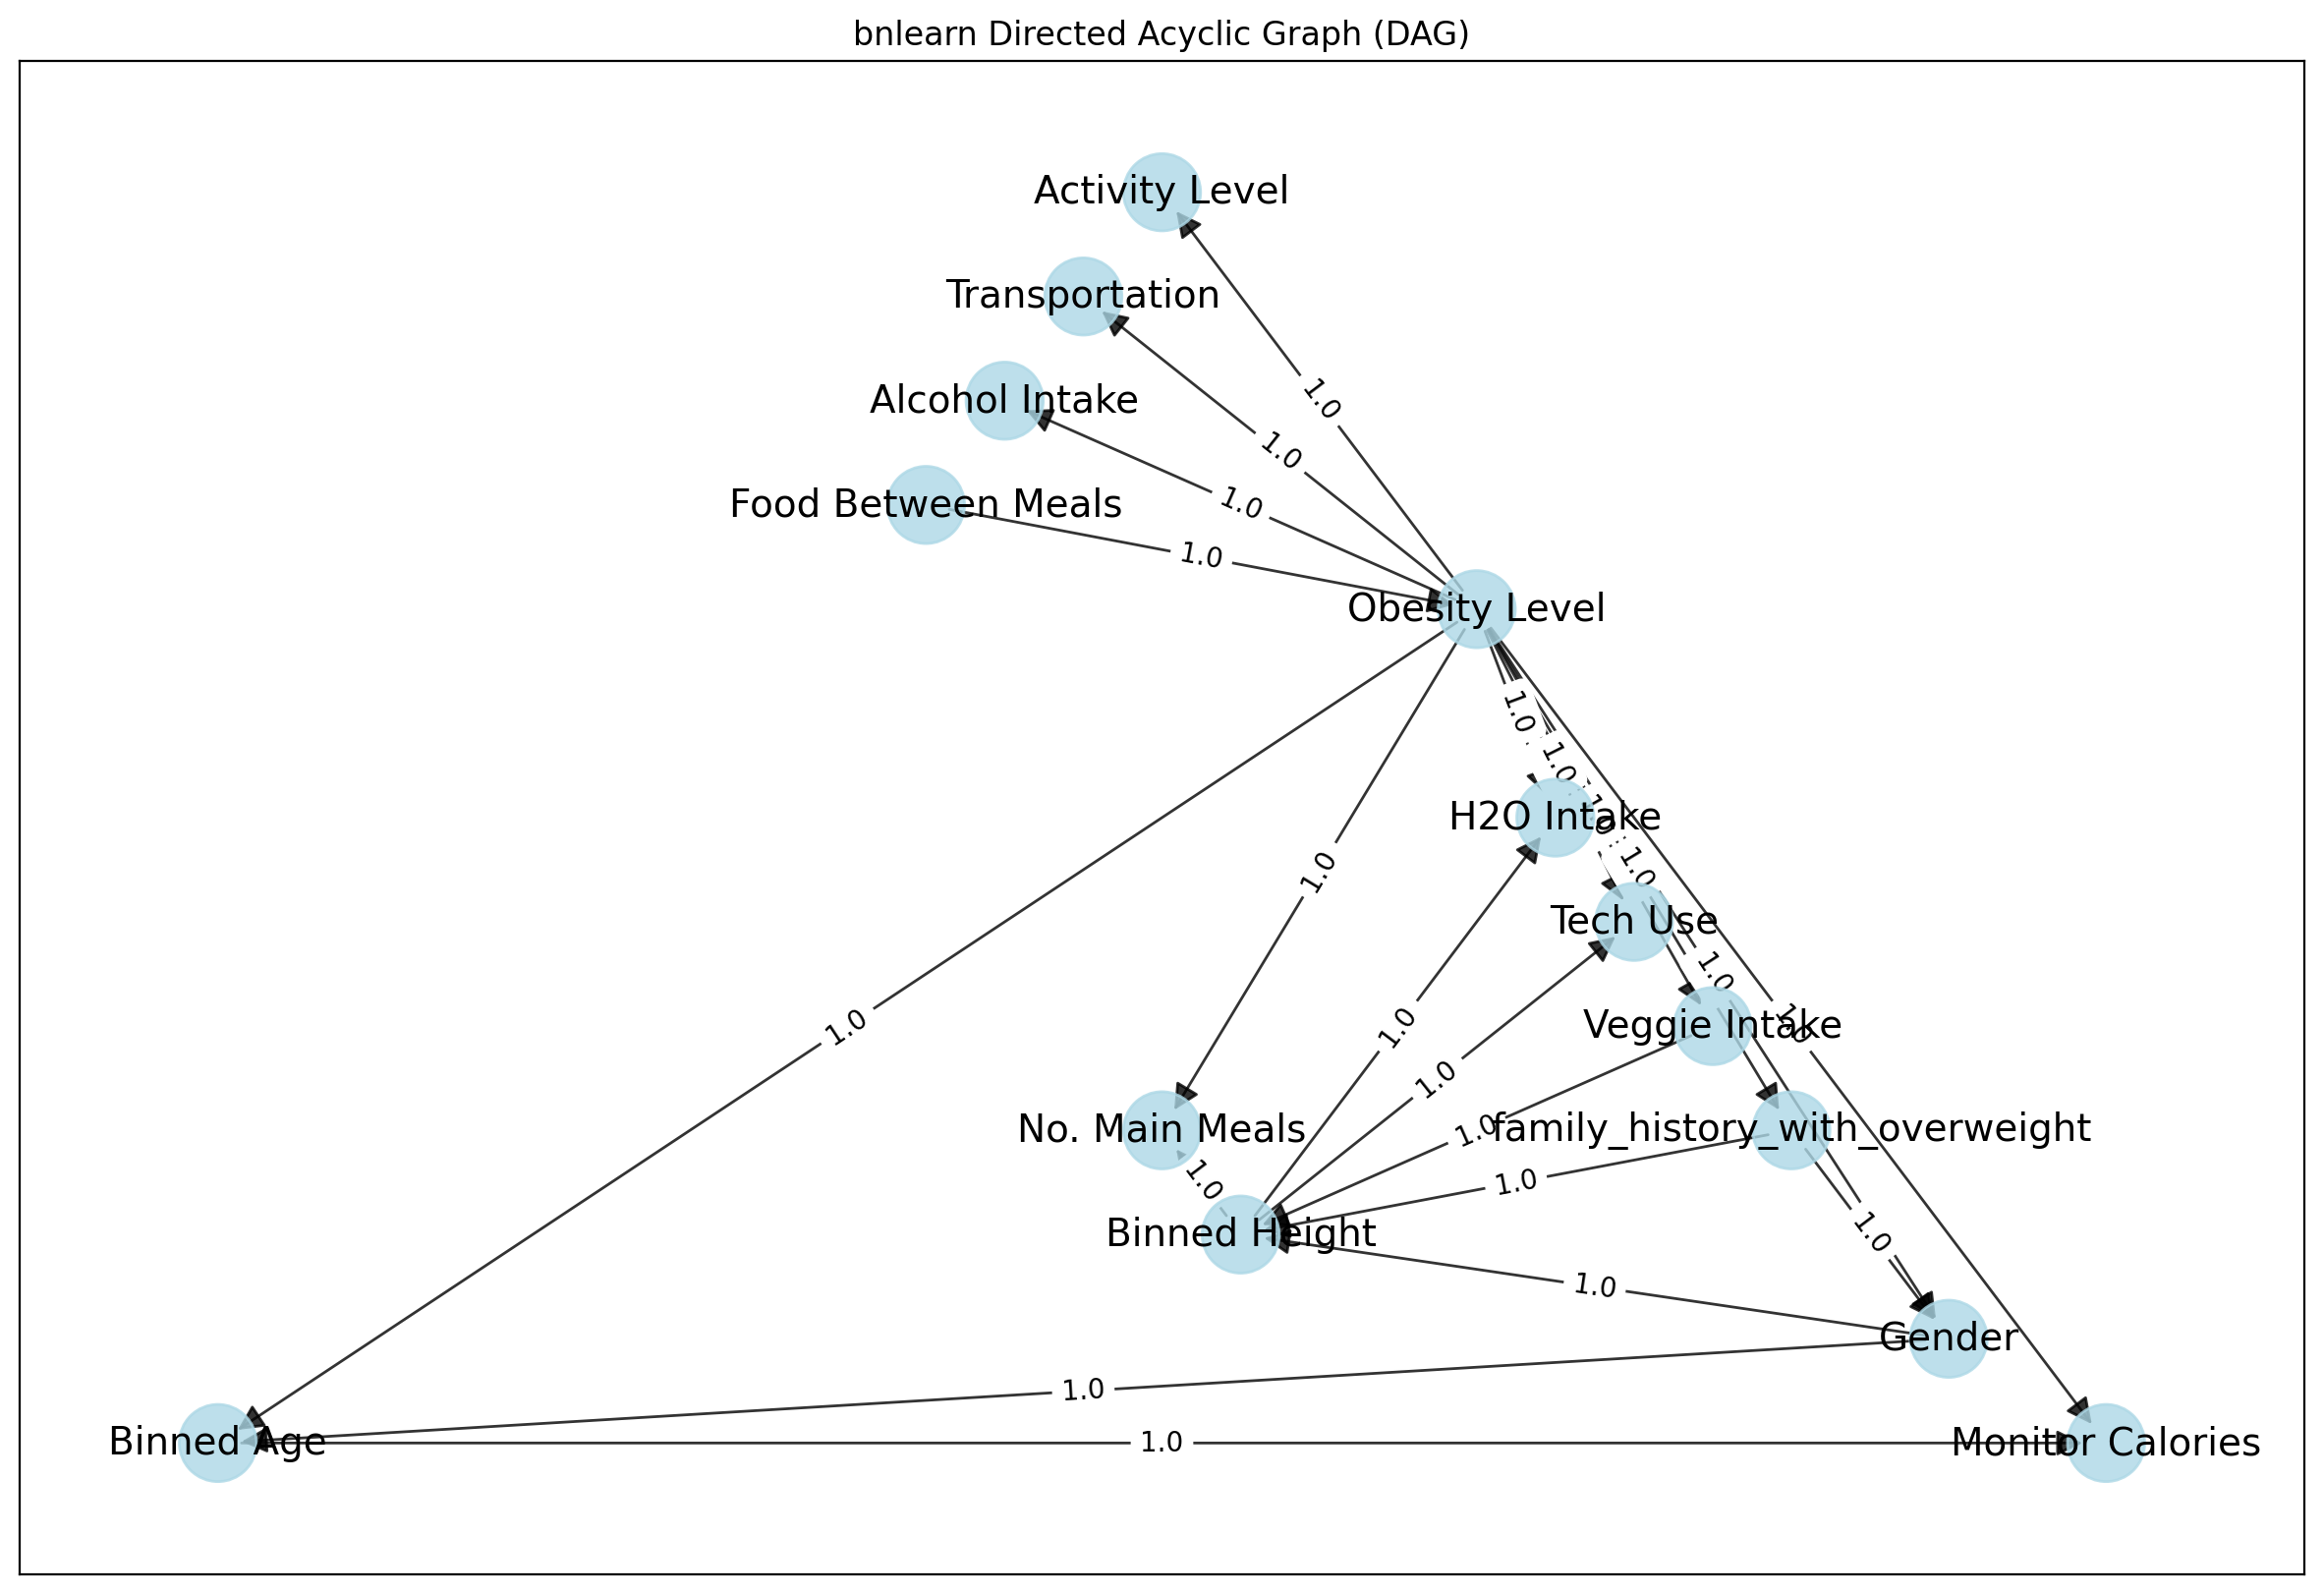

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


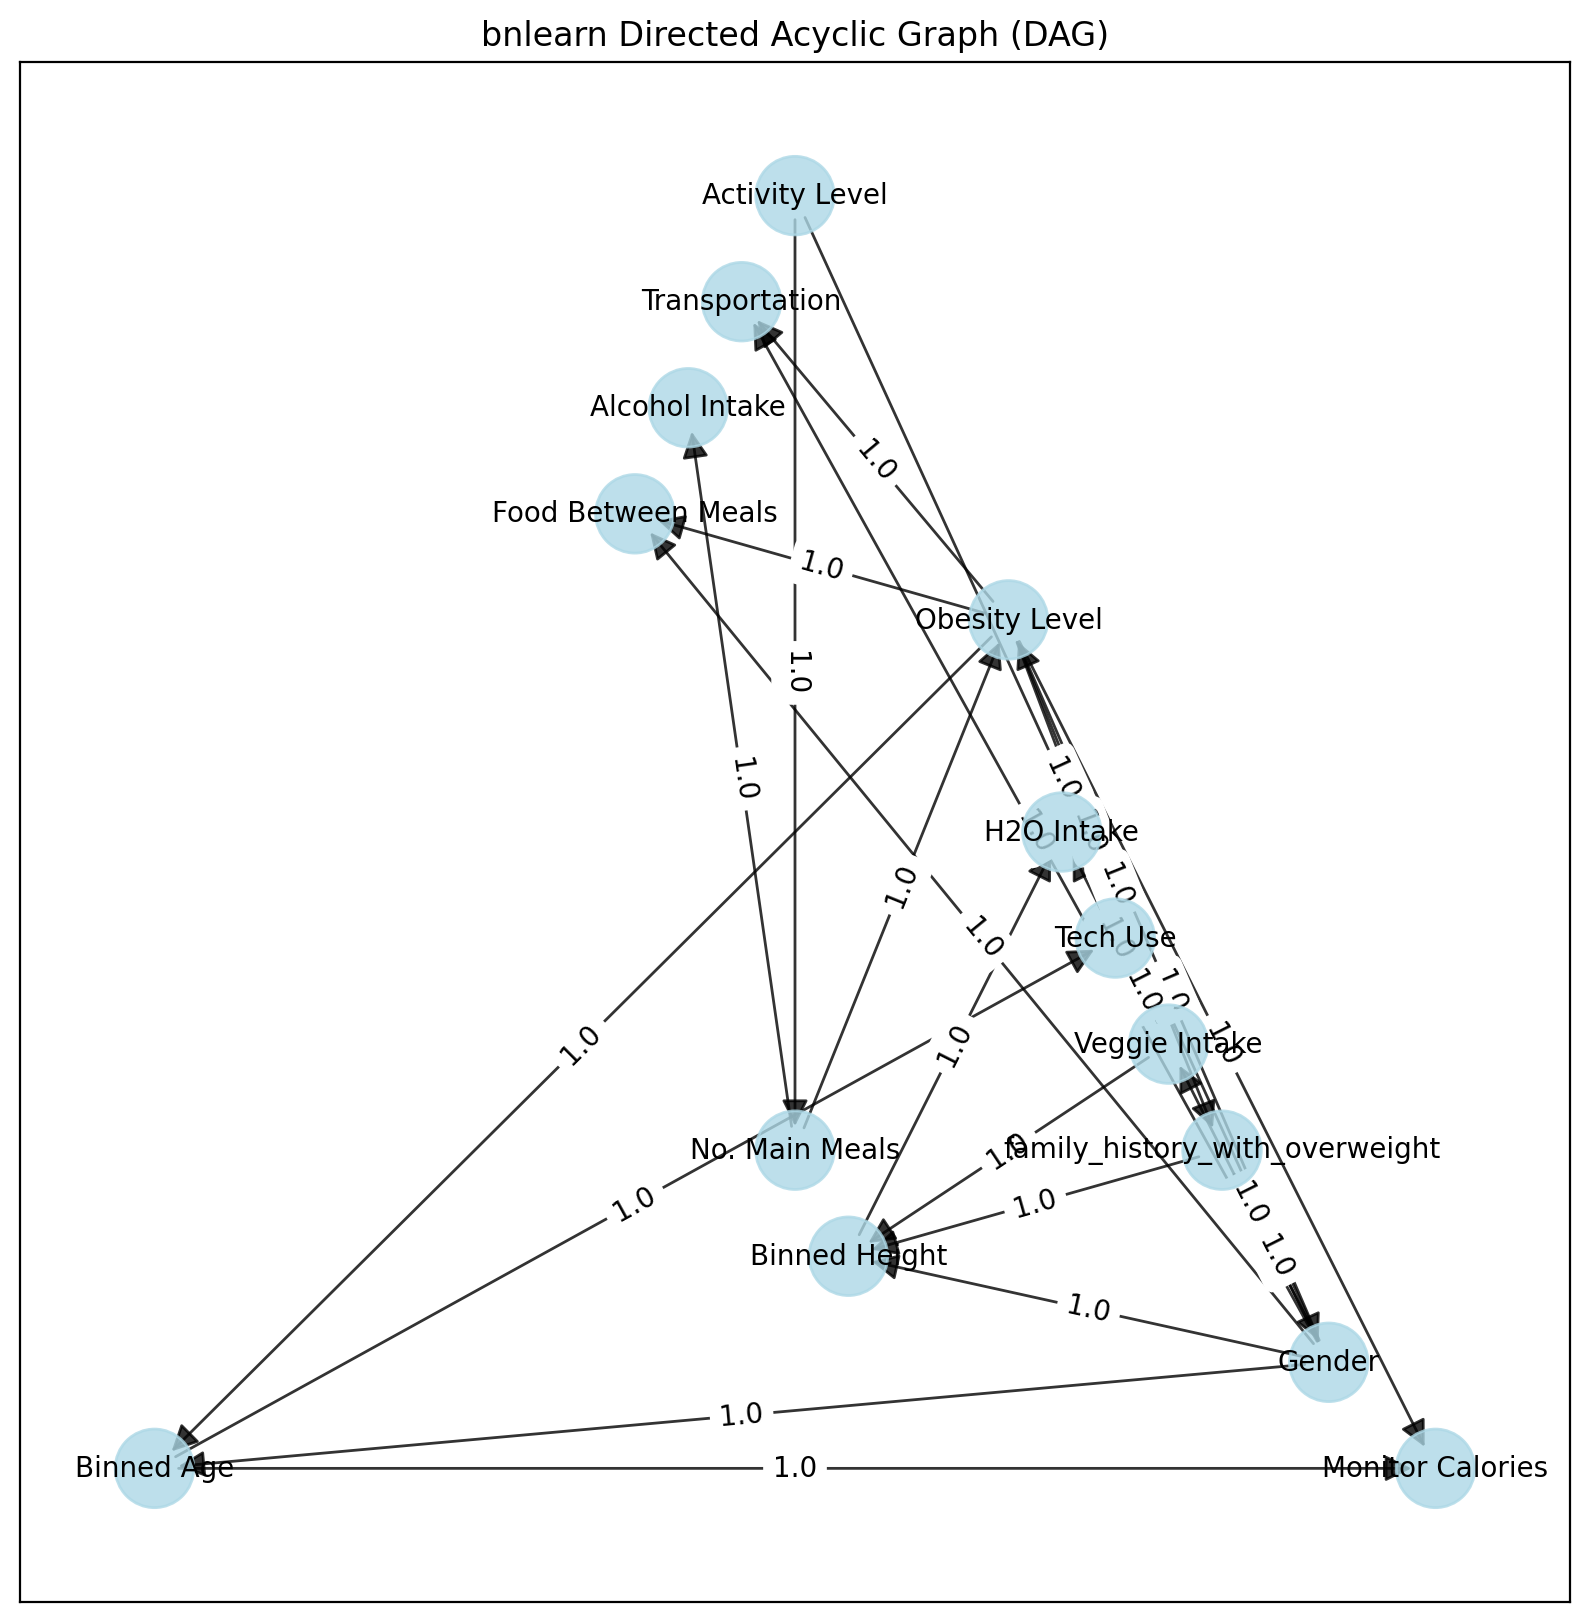

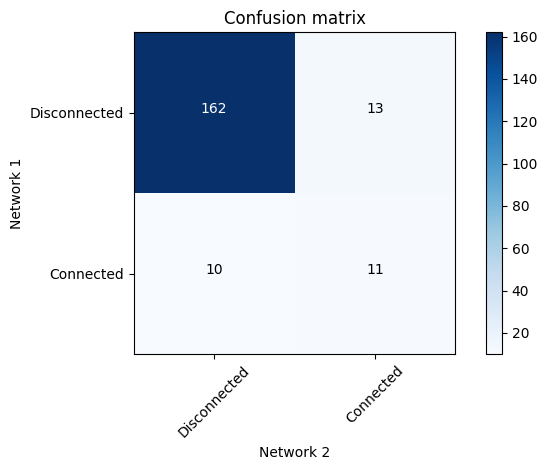

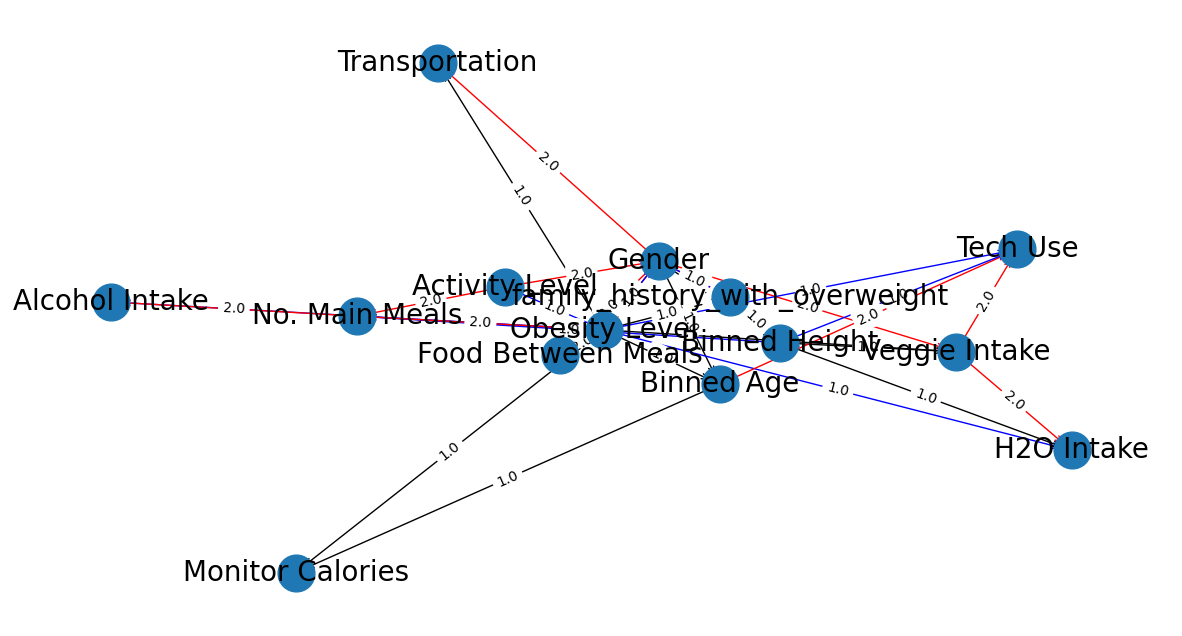

(array([[162,  13],
        [ 10,  11]]),
 target                          Gender  family_history_with_overweight  \
 source                                                                   
 Gender                               0                               2   
 family_history_with_overweight      -1                               0   
 Food Between Meals                   0                               0   
 Monitor Calories                     0                               0   
 Alcohol Intake                       0                               0   
 Transportation                       0                               0   
 Obesity Level                       -1                               1   
 Activity Level                       2                               0   
 Veggie Intake                        0                               0   
 No. Main Meals                       0                               0   
 H2O Intake                           0                   

In [15]:
model = model # Put your model object from part 1 here.


bin_model = bn.structure_learning.fit(data_subset_bin)
bn.plot_graphviz(model)
bn.plot_graphviz(bin_model)
G = bn.plot(model, params_static={'layout':'planar_layout'})
bn.plot(bin_model, pos=G['pos'])
bn.compare_networks(model, bin_model)

**Part 8 Written Response**

Binning Obesity Level changes the learned causal structure. This change can be seen in the differences between the original and binned DAGs. The number and direction of edges pointing to the Obesity Level node changed:
* Certain direct influences on Obesity Level, such as from Gender, Tech Use or Veggie Intake, are either weakened, removed, or rerouted.
* Certain broader variables like Binned Age or Binned Height gained more influence.

These structural changes occur because binning reduces the amount of detail in the data, leading to the loss of subtle variations in how predictors relate to the outcome. With fewer target classes, some variables lose their influence, especially if their effects were only relevant for specific obesity levels. Additionally, binning also simplifies the underlying conditional dependencies, causing the structure learning algorithm to discover different configurations that better fit the new variable classes.